         Caste   Yes    No  Unanswered
0  Upper Caste  11.0  88.6         0.4
1          OBC   4.8  94.8         0.4
2  SC/ST/Dalit   3.3  96.4         0.3
             Class   Yes    No  Unanswered
0             Rich  41.0  58.6         0.4
1  High Mid Income   9.3  90.2         0.5
2       Mid Income   2.2  97.5         0.3
3             Poor   1.6  98.2         0.2
    Religion   Yes    No  Unanswered
0      Hindu   5.8  93.8         0.4
1     Muslim   3.7  95.8         0.5
2  Christian  15.5  84.5         0.0
3     Others  13.2  86.3         0.5
       Education   Yes    No  Unanswered
0   No Education   1.9  97.6         0.5
1   Upto 5th Std   1.4  98.2         0.4
2    6th-9th Std   3.0  96.7         0.3
3  10th-12th Std   8.2  91.3         0.4
4    >= Graduate  33.9  65.9         0.2
  Region  Yes    No  Unanswered
0  Urban   12  87.6         0.4
1  Rural    3  96.6         0.4


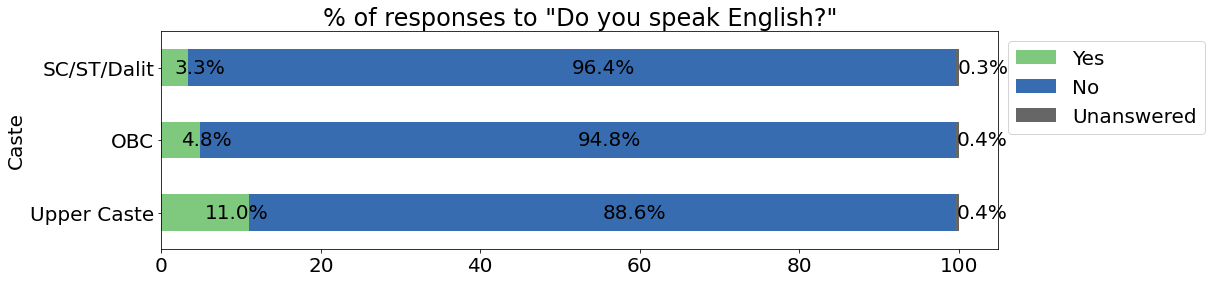

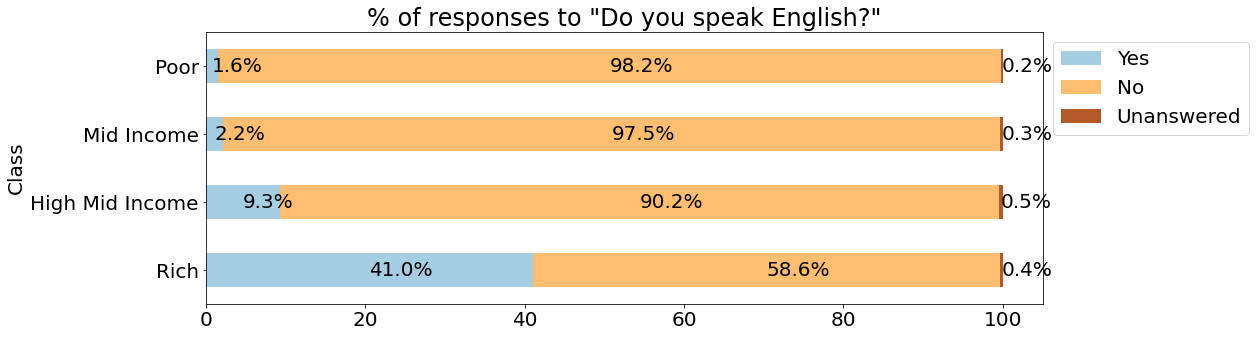

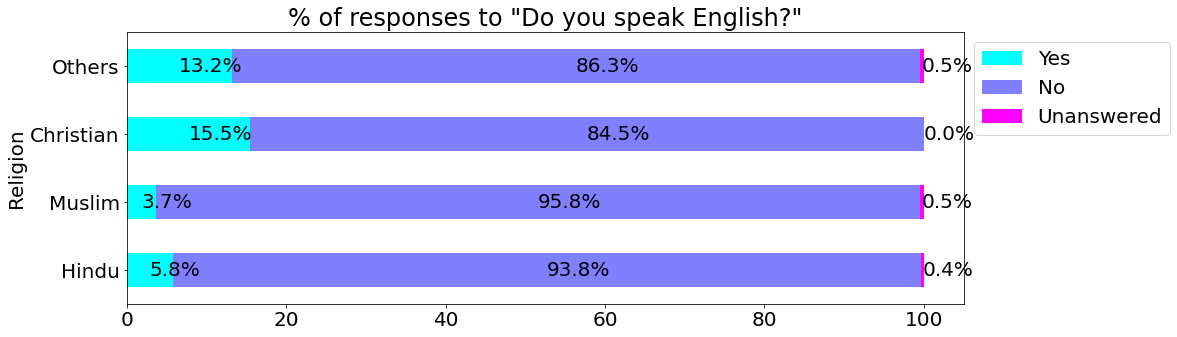

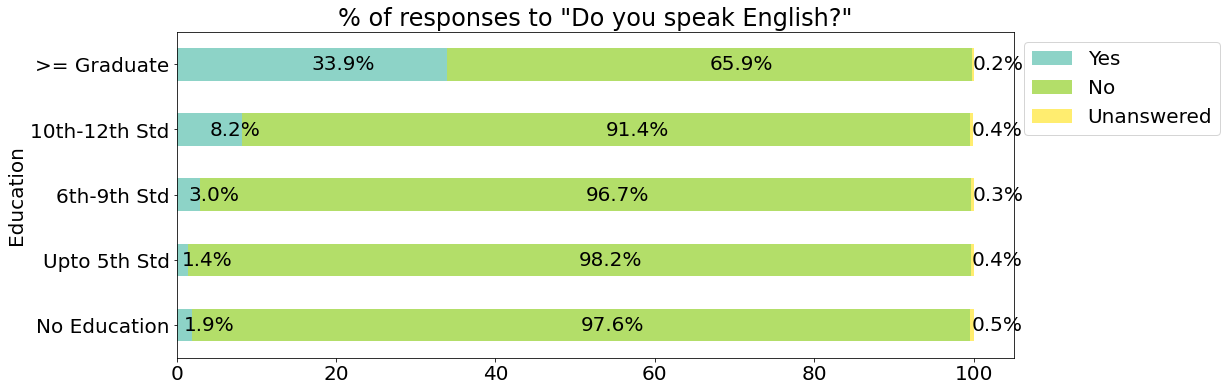

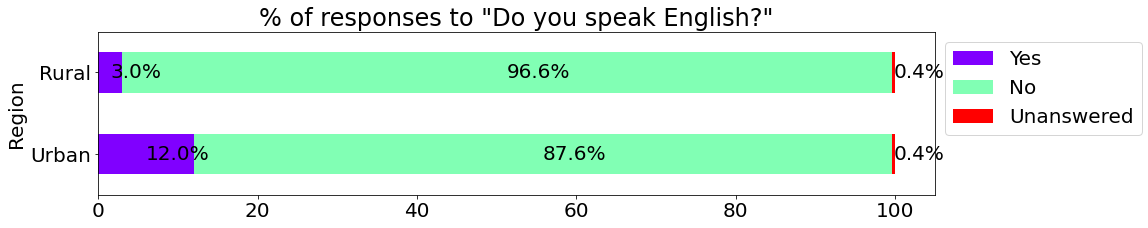

In [10]:
"""
Developed by Aindriya Barua in October, 2021
Thoughrough explantion of the code can be found in on my medium blog: https://medium.com/@barua.aindriya 
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def read_data(criteria):
  df = pd.read_excel("FactorsData/" + criteria + ".xlsx")
  print(df)
  return df

def draw_stacked_graph(criteria, color):
  df = read_data(criteria)  
  rows_count = len(df.index)
  
# plot a Stacked Bar Chart using matplotlib
  df.plot(
    x = criteria, 
    kind = 'barh', 
    stacked = True, 
    title = '% of responses to "Do you speak English?"', 
    figsize=(15, rows_count + 1),
    fontsize = 20,
    mark_right = True, 
    colormap = color)
  df_total = df["Yes"] + df["No"] + df["Unanswered"]
  df_rel = df[df.columns[1:]].div(df_total, 0)*100
  plt.rcParams.update({'font.size': 20})
  for n in df_rel:
      for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], df[n], df_rel[n])):
          plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', va = 'center', ha = 'left',  fontsize = 20)
  plt.legend( bbox_to_anchor=(1, 1), fontsize = 20)
  plt.savefig("OutputVisualisation/" + criteria + '_english.png')



if __name__ == '__main__':

  draw_stacked_graph("Caste", "Accent") 
  draw_stacked_graph("Class", "Paired") 
  draw_stacked_graph("Religion", "cool")
  draw_stacked_graph("Education", "Set3") 
  draw_stacked_graph("Region", "rainbow") 

    